In [83]:
import numpy as np
import pandas as pd 
import scipy as sp
import scipy.io
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import os
import glob
import fnmatch
import re

from ArapucaRoutineMainFunctions import *

In [84]:
#base_path = '/Users/bordoni/protoDUNE/XeDoping/Arapuca/mod304'
base_path = '/Users/bordoni/protoDUNE/XeDoping/testfiles'

file_path = os.path.join(base_path,'*.dat')
#file_name_list = [ os.path.basename(f) for f in glob.glob(file_path) ]
file_name_list =  glob.glob(file_path) 


#file_path

file_name_list

['/Users/bordoni/protoDUNE/XeDoping/testfiles/run11102_evt132112_mod603_ch5.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11102_evt132112_mod603_ch4.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11102_evt132112_mod603_ch6.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11102_evt132112_mod603_ch7.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11102_evt132112_mod603_ch3.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11102_evt132112_mod603_ch2.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11102_evt132112_mod603_ch0.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11102_evt132112_mod603_ch1.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11102_evt132112_mod603_ch9.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11102_evt132112_mod603_ch8.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11102_evt132112_mod603_ch10.dat',
 '/Users/bordoni/protoDUNE/XeDoping/testfiles/run11102_evt132112_mod603_ch11.dat']

In [85]:
import re


def parse_file_name(file_name):
    p = re.compile(os.path.join(base_path,     
    'run(?P<run_number>\d+)_evt(?P<run_part>\d+)_mod603_ch(?P<channel>\d+).dat') )

    m = p.match(file_name)
    d = m.groupdict()
    d['file_name'] = file_name
    return d

In [86]:
file_name_dict = [parse_file_name(f) for f in file_name_list]

In [87]:
def file_for_run_and_channel(dictt=file_name_dict, run=1234567, ch=4):
    return [ f['file_name'] for f in dictt if f['run_number'] == str(run) and f['channel'] == str(ch)]

def file_for_channel(dictt=file_name_dict, ch=4):
    return [ f['file_name'] for f in dictt if f['channel'] == str(ch)]

In [17]:
file_for_run_and_channel(file_name_dict, run=11102, ch=0)

['/Users/bordoni/protoDUNE/XeDoping/Arapuca/mod304/run11102_evt104049_mod304_ch0.dat',
 '/Users/bordoni/protoDUNE/XeDoping/Arapuca/mod304/run11102_evt43953_mod304_ch0.dat',
 '/Users/bordoni/protoDUNE/XeDoping/Arapuca/mod304/run11102_evt103896_mod304_ch0.dat']

In [29]:
mytest = file_for_channel(file_name_dict, ch=10)
mytest

NameError: name 'file_name_dict' is not defined

In [88]:
def readfile_list(filename_list):       
    
    def read_single_file(f):
        #load the file as a np array
        data = np.loadtxt(f)
        #data = pd.read_fwf(f, header=None)
        nevts = int(len(data)/2024)
        #reshape the array as 10000 events and 2024 columns each
        data = data.reshape(nevts, 2024)
        #create a dataframe from the numpy array
        return pd.DataFrame(data, columns=range(0,2024))
    
    data_list = [read_single_file(f) for f in filename_list]
    return pd.concat(data_list, axis=0)

In [89]:
def create_dataset_list(file_name_dict):
    
    df_list = []
    
    for i in range (0,12):
        print('loading files for channel ', i)
        tmp_filelist = file_for_channel(file_name_dict, ch=i)
        
        df_tmp = readfile_list(tmp_filelist)
        #print(type(df_tmp))
        
        df_list.append(df_tmp)
        
    return df_list


In [48]:
file_for_channel(file_name_dict, ch=1)

['/Users/bordoni/protoDUNE/XeDoping/testfiles/run11102_evt132112_mod603_ch1.dat']

In [90]:
df_list = create_dataset_list(file_name_dict)

loading files for channel  0
loading files for channel  1
loading files for channel  2
loading files for channel  3
loading files for channel  4
loading files for channel  5
loading files for channel  6
loading files for channel  7
loading files for channel  8
loading files for channel  9
loading files for channel  10
loading files for channel  11


In [115]:
tmp = df_list[10]
tmp.shape

(999, 2024)

In [280]:
df = pd.read_fwf('/Users/bordoni/protoDUNE/XeDoping/Arapuca/mod304/run11102_evt131865_mod304_ch0.dat', header=None)

In [37]:
df = pd.read_fwf('/Users/bordoni/protoDUNE/XeDoping/testfiles/run11102_evt132112_mod603_ch9.dat', header=None)

In [39]:
df.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [32]:
#df = pd.to_numeric(df[0], errors='coerce')
df = pd.to_numeric(df[0])
df


11102

In [283]:
nevts = int(len(df)/2024)
df.values.reshape(nevts, 2024)

ValueError: cannot reshape array of size 448221 into shape (221,2024)

In [292]:
pd.read_fwf('/Users/bordoni/protoDUNE/XeDoping/Arapuca/mod304/run11102_evt131865_mod304_ch1.dat', header=None).shape

FileNotFoundError: [Errno 2] No such file or directory: '/Users/bordoni/protoDUNE/XeDoping/Arapuca/mod304/run11102_evt131865_mod304_ch1.dat'

In [178]:
def loc_read_single_file(f):
    #load the file as a np array
    data = np.loadtxt(f)
    nevts = int(len(data)/2024)
    #reshape the array as 10000 events and 2024 columns each
    data = data.reshape(nevts, 2024)
    #create a dataframe from the numpy array
    
    return pd.DataFrame(data, columns=range(0,2024))

In [186]:
tmp = loc_read_single_file(mytest[0])
tmp

,0,1,2,3,4,5,6,7,8,9,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,11102.0,1.0,39958.0,304.0,48.0,10.0,142.0,0.0,0.0,0.0,...,1527.0,1525.0,1524.0,1528.0,1525.0,1526.0,1530.0,1524.0,1518.0,1529.0
1,11102.0,1.0,39960.0,304.0,48.0,10.0,142.0,0.0,0.0,0.0,...,1513.0,1514.0,1512.0,1516.0,1510.0,1509.0,1515.0,1516.0,1515.0,1518.0
2,11102.0,1.0,39962.0,304.0,48.0,10.0,142.0,0.0,0.0,0.0,...,1517.0,1517.0,1510.0,1514.0,1510.0,1514.0,1517.0,1510.0,1519.0,1504.0
3,11102.0,1.0,39964.0,304.0,48.0,10.0,142.0,0.0,0.0,0.0,...,1508.0,1510.0,1511.0,1515.0,1517.0,1515.0,1510.0,1510.0,1515.0,1511.0
4,11102.0,1.0,39986.0,304.0,48.0,10.0,142.0,0.0,0.0,0.0,...,1512.0,1510.0,1509.0,1509.0,1513.0,1508.0,1512.0,1511.0,1509.0,1515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,11102.0,1.0,43949.0,304.0,48.0,10.0,142.0,0.0,0.0,0.0,...,1514.0,1518.0,1509.0,1515.0,1515.0,1513.0,1520.0,1515.0,1518.0,1518.0
992,11102.0,1.0,43951.0,304.0,48.0,10.0,142.0,0.0,0.0,0.0,...,1534.0,1534.0,1534.0,1530.0,1536.0,1530.0,1529.0,1529.0,1523.0,1527.0
993,11102.0,1.0,43953.0,304.0,48.0,10.0,142.0,0.0,0.0,0.0,...,1516.0,1516.0,1508.0,1516.0,1515.0,1512.0,1517.0,1517.0,1517.0,1506.0
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
filelist = file_for_channel(file_name_dict, ch=3)
filelist

['/Users/bordoni/protoDUNE/XeDoping/Arapuca/mod304/run11102_evt131865_mod304_ch3.dat',
 '/Users/bordoni/protoDUNE/XeDoping/Arapuca/mod304/run11102_evt43953_mod304_ch3.dat',
 '/Users/bordoni/protoDUNE/XeDoping/Arapuca/mod304/run11102_evt103896_mod304_ch3.dat']

In [34]:
import fnmatch

listch0 =[]
listch1 =[]
listch2 =[]
listch3 =[]
listch4 =[]
listch5 =[]


for f in filelist:
    if (fnmatch.fnmatch(f, '*_ch0.dat') ):
        listch0.append(f)
    if (fnmatch.fnmatch(f, '*_ch1.dat') ):
        listch1.append(f)
    if (fnmatch.fnmatch(f, '*_ch2.dat') ):
        listch2.append(f)
    if (fnmatch.fnmatch(f, '*_ch3.dat') ):
        listch3.append(f)
    if (fnmatch.fnmatch(f, '*_ch4.dat') ):
        listch4.append(f)
    if (fnmatch.fnmatch(f, '*_ch5.dat') ):
        listch5.append(f)


In [73]:
df_ch0_raw.shape

(1993, 2024)

In [72]:
df_ch0_raw = readfile_list(listch0)
df_ch0_raw 

,0,1,2,3,4,5,6,7,8,9,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,11102.0,1.0,4.0,304.0,48.0,0.0,132.0,0.0,0.0,0.0,...,1550.0,1553.0,1547.0,1546.0,1551.0,1546.0,1556.0,1546.0,1550.0,1550.0
1,11102.0,1.0,8.0,304.0,48.0,0.0,132.0,0.0,0.0,0.0,...,1546.0,1545.0,1545.0,1548.0,1549.0,1539.0,1550.0,1552.0,1550.0,1547.0
2,11102.0,1.0,12.0,304.0,48.0,0.0,132.0,0.0,0.0,0.0,...,1545.0,1548.0,1548.0,1545.0,1550.0,1546.0,1554.0,1545.0,1547.0,1551.0
3,11102.0,1.0,16.0,304.0,48.0,0.0,132.0,0.0,0.0,0.0,...,1544.0,1547.0,1548.0,1547.0,1546.0,1546.0,1549.0,1548.0,1545.0,1548.0
4,11102.0,1.0,20.0,304.0,48.0,0.0,132.0,0.0,0.0,0.0,...,1546.0,1548.0,1547.0,1543.0,1544.0,1549.0,1545.0,1546.0,1554.0,1553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,11102.0,1.0,7997.0,304.0,48.0,0.0,132.0,0.0,0.0,0.0,...,1554.0,1549.0,1543.0,1550.0,1543.0,1544.0,1548.0,1548.0,1540.0,1545.0
993,11102.0,1.0,7999.0,304.0,48.0,0.0,132.0,0.0,0.0,0.0,...,1536.0,1536.0,1537.0,1539.0,1542.0,1539.0,1542.0,1539.0,1536.0,1541.0
994,11102.0,1.0,8001.0,304.0,48.0,0.0,132.0,0.0,0.0,0.0,...,1552.0,1553.0,1543.0,1551.0,1545.0,1551.0,1549.0,1546.0,1547.0,1548.0
995,11102.0,1.0,8003.0,304.0,48.0,0.0,132.0,0.0,0.0,0.0,...,1549.0,1547.0,1544.0,1546.0,1550.0,1546.0,1543.0,1542.0,1551.0,1546.0


In [10]:
ped   = list(range(100, 200))   # to estimate the pedestal
rowin = list(range(24, 2024))   # all readout window
wf    = list(range(250, 1500))  # waveform 
tail  = list(range(1700, 2000)) # to estimate the single p.e.
pe    = list(range(200, 800))

<function matplotlib.pyplot.show(*args, **kw)>

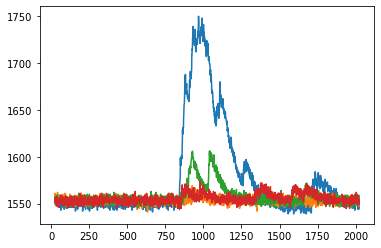

In [11]:
tmp.iloc[0,rowin].plot()
tmp.iloc[1,rowin].plot()
tmp.iloc[2,rowin].plot()
tmp.iloc[3,rowin].plot()
plt.show